In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [4]:
lr = 0.5
num_epochs = 20000
reset_every = 2000

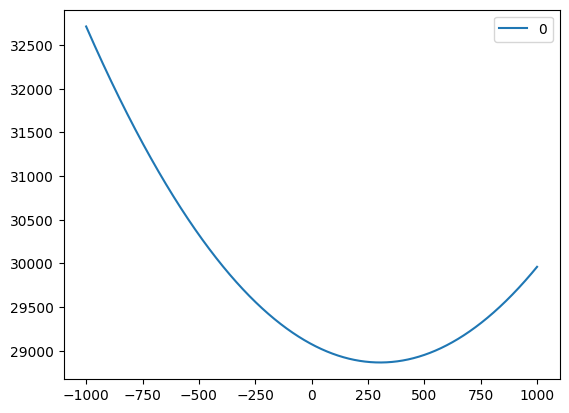

304.1304130413041


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 28412.48it/s, disturbance=1.74e-6]


[  -5.39172267 -233.8727339   524.41696294  319.76570569  -62.69197165
 -115.15170575 -206.98948121  118.54450343  455.85553546   84.91025041
  152.13348416]
some positive!


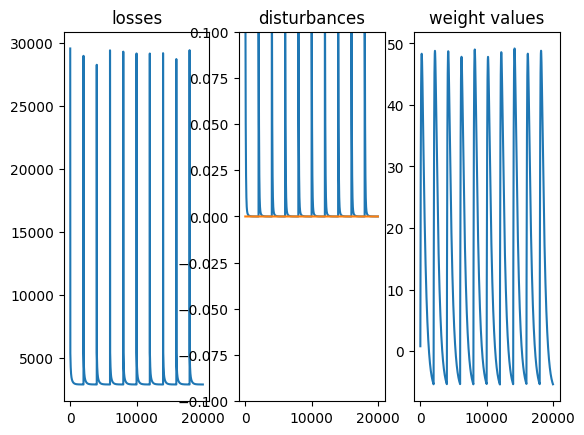

In [7]:
# load data
d = 10

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, :d]
X = np.append(X, np.ones((X.shape[0], 1)), axis=1)

# make model
w = np.zeros(X.shape[1])
j = 0
xs = []
ys = []
for w_val in np.linspace(-1000, 1000, 10000):
    _w = w.copy()
    _w[j] = w_val
    pred = X @ _w
    loss = np.mean((pred - y) ** 2)
    xs.append(w_val)
    ys.append(loss)
plt.plot(xs, ys, label=j)
plt.legend()
plt.show()
print(xs[np.argmin(ys)])

# train
train_losses = [0]
disturbances = []
w_vals = []
prev_loss = 0.
prev_grad = 0.
for i in (pbar := tqdm.trange(num_epochs)):
    
    if i % reset_every == 0:
        w = np.random.randn(X.shape[1])
    
    pred = X @ w
    loss = np.mean((pred - y) ** 2)
    grad = (2 * (pred - y).reshape(-1, 1) * X).mean(axis=0)
    
    w -= lr * grad
    
    pred_loss = prev_loss - lr * np.dot(prev_grad, prev_grad)
    disturbance = loss - pred_loss
    
    if i % 50 == 0: pbar.set_postfix({'disturbance': disturbance})
    prev_loss = loss
    prev_grad = grad
    disturbances.append(disturbance)
    w_vals.append(w[j])
    train_losses.append(loss)

fig, ax = plt.subplots(1, 3)
ax[0].plot(range(len(train_losses) - 1), train_losses[1:])
ax[0].set_title('losses')
ax[1].plot(range(len(disturbances[1:])), disturbances[1:])
ax[1].plot(range(len(disturbances[1:])), [0 for _ in range(len(disturbances[1:]))])
ax[1].set_title('disturbances')
ax[1].set_ylim([-0.1, 0.1]);
ax[2].plot(range(len(w_vals)), w_vals)
ax[2].set_title('weight values')
print(w)
disturbances = np.array(disturbances)[1:]
if np.any(disturbances > 0):
    print('some positive!')
if np.any(disturbances < 0):
    print('some negative!')

In [ ]:
# load data
d = 10

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, :d]
X = np.append(X, np.ones((X.shape[0], 1)), axis=1)

# make model
w = np.zeros(X.shape[1])

i = 0
for _ in range(50):
    eps = np.random.randn_like(w)
    